In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/vaccinaation_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340000e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.340000e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21-09-2009 15:27,834,666,178,False,13-12-2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.340000e+18,eliðŸ‡±ðŸ‡¹ðŸ‡ªðŸ‡ºðŸ‘Œ,Your Bed,"heil, hydra ðŸ–â˜º",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.340000e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10-09-2008 11:28,49165,3933,21853,True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.340000e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23-04-2020 17:58,152,580,1473,False,12-12-2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
text_df = text_df.drop_duplicates('text')

In [7]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(50)

,text,polarity
0,Same folks said daikon paste could treat a cyt...,0.000000
1,While the world has been on the wrong side of ...,-0.500000
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.000000
3,"Facts are immutable, Senator, even when you're...",-0.050000
4,Explain to me again why we need a vaccine @Bor...,0.000000
5,Does anyone have any useful advice/guidance fo...,0.400000
6,it is a bit sad to claim the fame for success ...,-0.100000
7,There have not been many bright days in 2020 b...,0.675000
8,Covid vaccine; You getting it?\n\n #CovidVacci...,0.000000
9,#CovidVaccine \n\nStates will start getting #C...,0.000000


In [9]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.00,Neutral
1,While the world has been on the wrong side of ...,-0.50,Negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.00,Neutral
3,"Facts are immutable, Senator, even when you're...",-0.05,Negative
4,Explain to me again why we need a vaccine @Bor...,0.00,Neutral


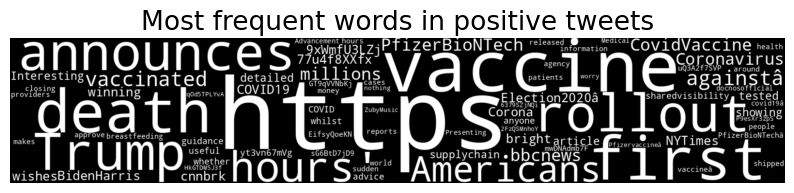

In [19]:
text1 = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=300,prefer_horizontal=1,min_word_length=5
                      ,color_func=lambda *args,**kwargs:"white").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

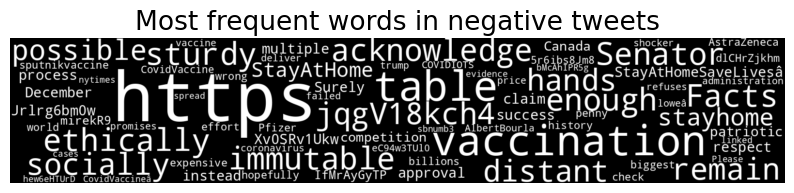

In [17]:
text1 = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=300,prefer_horizontal=1,min_word_length=5
                      ,color_func=lambda *args,**kwargs:"white").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

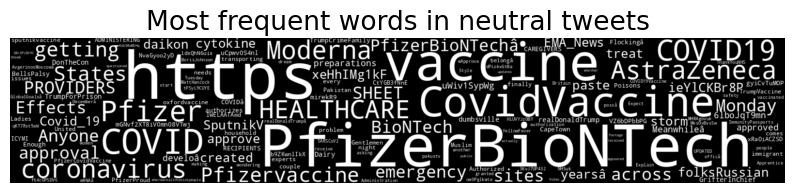

In [18]:
text1 = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=300,prefer_horizontal=1,min_word_length=5
                      ,color_func=lambda *args,**kwargs:"white").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()